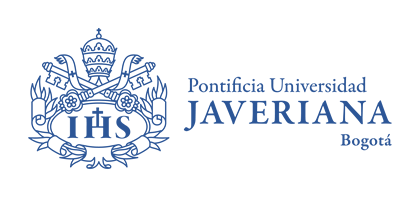

#**Web Scraping - Proyecto Procesamiento de Lenguaje Natural**

###**Realizado por:**

-   Diego Garzón
-   Sebastián Herrera
-   Carlos Másmela
-   Yudy Pedraza

###**Resumen:**

El siguiente Notebook tiene como propósito mostrar cómo fue conseguida la información para el proyecto de Procesamiento de Lenguaje Natural.

# **Librerias**

In [14]:
!pip install beautifulsoup4
!pip install requests

In [79]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from pathlib import Path

# **Identificación de artistas y canciones**

In [91]:
def busqueda_link_artista(artista: str) -> str:
  """
  Función encargada de traer las canciones del artista seleccionado
  """

  artista_link = artista.replace(" ", "-").lower()
  link = f'https://www.letras.com/{artista_link}/mais_acessadas.html'
  response = requests.get(link)
  return BeautifulSoup(response.content, 'html.parser')

In [92]:
def busqueda_lista_canciones(artista: str) -> list[str]:
  """
  Función encargada de buscar los path donde se encuentran las canciones de cada artista
  """

  first_soup = busqueda_link_artista(artista)
  canciones = first_soup.find_all(class_="songList-table-row --song isVisible") #Encuentra el path con otra información #OJO AQUI, PUEDEN CAMBIAR EL COSO / song-name
  patron = r'"\/(.*?)\/"'
  path_canciones = [re.findall(patron, str(cancion))[0] for cancion in canciones] #Se limpia el path de busqueda
  return path_canciones

In [93]:
# first_soup = busqueda_link_artista("bad bunny")
# canciones = first_soup.find_all(class_="songList-table-row --song isVisible") #Encuentra el path con otra información
# #print(canciones)
# patron = r'"\/(.*?)\/"'
# path_canciones = [re.findall(patron, str(cancion))[0] for cancion in canciones] #Se limpia el path de busqueda
# print(path_canciones)

# **Extracción de letra de canciones**

In [119]:
def extraccion_data(soup: str) -> list[str]:
  """
  Función encargada de sacar Género, Artista, Título y Canción
  """

  #Sección encargada de extraer genero, artista y titulo

  gen_art_tit=soup.find_all(itemprop="name") #aqui se encuentra casi todo lo de genero, artista y titulo
  patron = r'>(.*?)<' #solo extrae lo que está dentro de eso
  vector = [re.findall(patron, str(texto))[0] for texto in gen_art_tit[1:]] #Genera vector de lo mencionado anteriormente, findall trae un vector por eso solo se trae la pos 0

  #print(soup.find("body"))

  #Sección encargada de extraer la canción

  cancion=soup.find_all(class_="lyric-original")[0] #OJO QUE LO CAMBIAN - cnt-letra
  patron_etiqueta = r'<[^>]+>'
  patron_saltos = r'\n \n'
  texto_sin_etiquetas = re.sub(patron_etiqueta, '\n', str(cancion))
  texto_final = re.sub(patron_saltos, '', texto_sin_etiquetas)
  vector.append(texto_final)

  #Crear archivo TXT
  nombre_archivo = carpeta_artista + "/" + str(vector[2]) + ".txt"
  with open(nombre_archivo, 'w') as archivo:
    archivo.write(vector[3])

  return vector

In [95]:
def recoleccion_informacion_cancion(path: list, cantidad_canciones_extraer: int) -> list[str]:
  """
  A partir de los path generados procede a guardar en un arreglo toda la informacion inicial necesaria para el proyecto
  """

  vector_canciones = []
  urls = ["https://www.letras.com/" + path_unico + "/" for path_unico in path]
  for url in urls[:cantidad_canciones_extraer]:
    response = requests.get(url)
    html_content = response.content
    soup = BeautifulSoup(html_content, 'html.parser')
    vector_canciones.append(extraccion_data(soup))
  return vector_canciones

# **Main**

Se debe poner cuales artistas y cuántas canciones se sacarán del mismo

In [124]:
global nombre_carpeta
global carpeta_artista

In [125]:
artistas = ["Bad Bunny", "Maluma", "Feid", "Karol G"] #Artistas a extraer canciones
canciones_scrappear_por_artista = 30 #cantidad de canciones a Scrapear por artista
nombre_carpeta = "Reggaetón" #Genero Scrapeado para crear carpeta

Crear Carpeta

In [126]:
def crear_carpeta(nc:str) -> None:
  carpeta = Path(nc)
  carpeta.mkdir()

In [127]:
crear_carpeta(nombre_carpeta)

Ejecutar el programa

In [128]:
canciones = [] #vector solución
for artista in artistas:
  carpeta_artista = nombre_carpeta + "/" + artista
  crear_carpeta(carpeta_artista)
  path = busqueda_lista_canciones(artista)
  print(path)
  canciones_artistas = recoleccion_informacion_cancion(path, canciones_scrappear_por_artista)
  canciones = canciones + canciones_artistas

['bad-bunny/tu-no-vive-asi', 'bad-bunny/te-bote', 'bad-bunny/me-porto-bonito-part-chencho-corleone', 'bad-bunny/ojitos-lindos-part-bomba-estereo', 'bad-bunny/where-she-goes', 'bad-bunny/yonaguni', 'bad-bunny/soy-peor', 'bad-bunny/titi-me-pregunto', 'bad-bunny/callaita', 'bad-bunny/otro-atardecer-part-the-marias', 'bad-bunny/sensualidad', 'bad-bunny/moscow-mule', 'bad-bunny/amorfoda', 'bad-bunny/es-una-diabla-part-farruko-y-lary-over', 'bad-bunny/un-verano-sin-ti', 'bad-bunny/cancion-con-yandel-part-yandel', 'bad-bunny/como-se-siente-remix-part-jhay-cortez', 'bad-bunny/haciendo-que-me-amas', 'bad-bunny/tu-no-metes-cabra-remix-part-daddy-yankee-hector-el-father-anuel-y-cosculluela', 'bad-bunny/la-corriente-part-tony-dize', 'bad-bunny/la-santa-part-daddy-yankee', 'bad-bunny/un-coco', 'bad-bunny/tu-no-metes-cabra', 'bad-bunny/me-mata', 'bad-bunny/tarot-part-jhay-cortez', 'bad-bunny/agosto', 'bad-bunny/efecto', 'bad-bunny/dakiti-part-jhay-cortez', 'bad-bunny/una-vez-part-mora', 'bad-bunny/a

Imprimir solución para exportar

In [129]:
columnas = ['Genero', 'Artista', 'Titulo', 'Cancion']
resultado = pd.DataFrame(canciones, columns=columnas)
resultado

,Genero,Artista,Titulo,Cancion
0,Reggaeton,Bad Bunny,"Tú No Vive Así (part. Arcangel, DJ Luian y Mam...","Me acostumbré al sour, ya no patea\nMe llegan ..."
1,Reggaeton,Bad Bunny,"Te Bote (remix) (part. Casper, Nio García, Dar...","[Darell]\nEste es el verdadero remix, baby\n\n..."
2,Reggaeton,Bad Bunny,Me Porto Bonito (part. Chencho Corleone),Yeah-yeah-yeah-yeah-yeah-yeah\nEy\n\nEn la gua...
3,Reggaeton,Bad Bunny,Ojitos Lindos (part. Bomba Estéreo),Hace mucho tiempo le hago caso al corazón\nY p...
4,Reggaeton,Bad Bunny,Where She Goes [explicit],"Baby, dime la verdad\nSi te olvidaste de mí\nY..."
...,...,...,...,...
115,Reggaeton,KAROL G,CAROLINA,"Cariño mío\nQuédate aquí, no te vayas\nLa call..."
116,Reggaeton,KAROL G,SEJODIOTO,"Me cansé de relacione', no quiero más prisione..."
117,Reggaeton,KAROL G,PROVENZA (remix) (part. Tiësto),"Baby, ¿qué más?\nHace rato que no sé na' de ti..."
118,Reggaeton,KAROL G,A Ella,Ella jugó a darte lo que más querías\nYo jugué...


In [130]:
nombre_archivo_csv = nombre_carpeta + "/" + nombre_carpeta + "_consolidado_todo" + ".csv"
resultado.to_csv(nombre_archivo_csv, index=False)

Descagar todo

In [131]:
import shutil

carpeta_a_comprimir = nombre_carpeta
nombre_archivo_zip = nombre_carpeta + "_descargar_"

shutil.make_archive(nombre_archivo_zip, 'zip', carpeta_a_comprimir)

'/content/Reggaetón_descargar_.zip'